In [1]:
import numpy as np
from sklearn import model_selection
#from sklearn import preprocessing, cross_validation
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Load Dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
names = ['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class']
data = pd.read_csv(url, names=names)

In [3]:
# Preprocess the data
data.replace('?',-99999, inplace=True)
print(data.axes)

data.drop(['id'], 1, inplace=True)

[RangeIndex(start=0, stop=699, step=1), Index(['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class'],
      dtype='object')]


In [4]:
#visualize and explore the data
print(data.loc[20])

# Print the shape of the dataset
print(data.shape)

clump_thickness            7
uniform_cell_size          3
uniform_cell_shape         2
marginal_adhesion         10
single_epithelial_size     5
bare_nuclei               10
bland_chromatin            5
normal_nucleoli            4
mitoses                    4
class                      4
Name: 20, dtype: object
(699, 10)


In [5]:
#describing the data
print(data.describe())

       clump_thickness  uniform_cell_size  uniform_cell_shape  \
count       699.000000         699.000000          699.000000   
mean          4.417740           3.134478            3.207439   
std           2.815741           3.051459            2.971913   
min           1.000000           1.000000            1.000000   
25%           2.000000           1.000000            1.000000   
50%           4.000000           1.000000            1.000000   
75%           6.000000           5.000000            5.000000   
max          10.000000          10.000000           10.000000   

       marginal_adhesion  single_epithelial_size  bland_chromatin  \
count         699.000000              699.000000       699.000000   
mean            2.806867                3.216023         3.437768   
std             2.855379                2.214300         2.438364   
min             1.000000                1.000000         1.000000   
25%             1.000000                2.000000         2.000000   


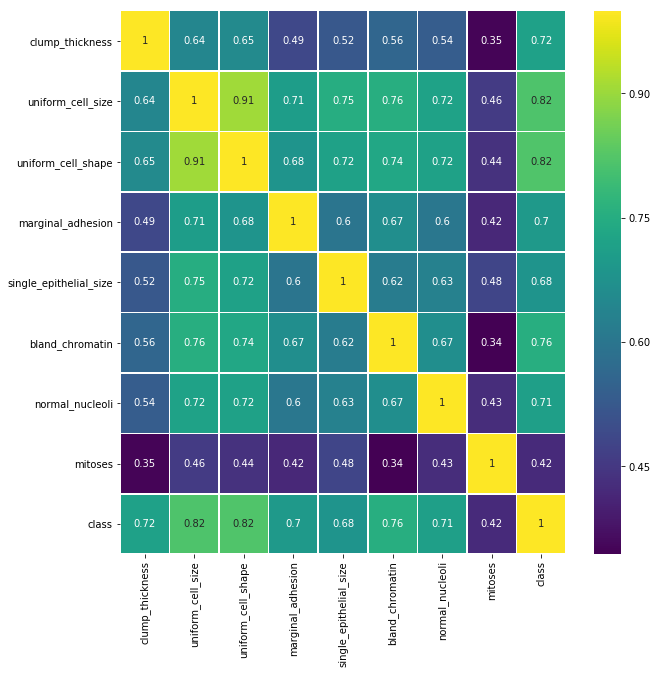

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
corrmat = data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corrmat,cmap='viridis',annot=True,linewidths=0.5,)

In [7]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)


In [167]:
#Creating X and y datasets for training

X = np.array(data.drop(['class', 'uniform_cell_size'],1))
y = np.array(data ['class'])


X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y, test_size = 0.2)

In [168]:
#Specify the testing option
seed= 1
scoring = 'accuracy'

In [169]:
#Define models to train
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
models = []
models.append(('KNN', KNeighborsClassifier(n_neighbors = 3)))
models.append(('SVM', SVC(gamma = 'auto', kernel= 'rbf')))
models.append(('CART', DecisionTreeClassifier()))
models.append(('LR', LogisticRegression()))
models.append(('RFC', RandomForestClassifier(max_depth=5, n_estimators = 40)))

# evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state = seed)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean()*100, cv_results.std())
    print(msg)

KNN: 96.068182 (0.017457)
SVM: 95.711039 (0.025473)
CART: 93.918831 (0.019852)
LR: 95.532468 (0.014337)
RFC: 97.136364 (0.014319)


1.	Voting Classifier -: The idea behind the VotingClassifier is to combine conceptually different machine learning classifiers and use a majority vote or the average predicted probabilities (soft vote) to predict the class labels. Such a classifier can be useful for a set of equally well performing model in order to balance out their individual weaknesses. 

In [170]:
from sklearn.ensemble import VotingClassifier

ensemble = VotingClassifier(estimators = models, voting = 'hard', n_jobs = -1)

ensemble.fit(X_train, y_train)

predictions = ensemble.score(X_test, y_test)*100


print("The Voting Classifier Accuracy is: ", predictions)


The Voting Classifier Accuracy is:  98.57142857142858


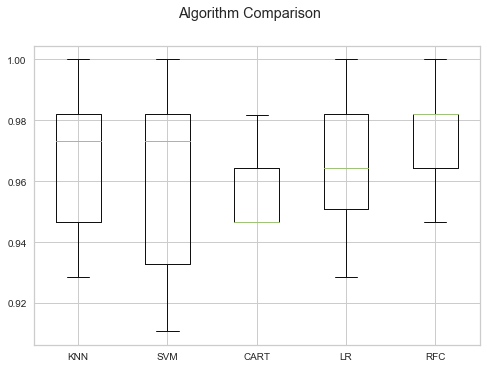

In [146]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [133]:
# Make predictions on validation dataset

for name, model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(name)
    print(accuracy_score(y_test, predictions)*100)
    print(classification_report(y_test, predictions))

KNN
94.28571428571428
              precision    recall  f1-score   support

           2       0.97      0.95      0.96        93
           4       0.90      0.94      0.92        47

   micro avg       0.94      0.94      0.94       140
   macro avg       0.93      0.94      0.94       140
weighted avg       0.94      0.94      0.94       140

SVM
95.0
              precision    recall  f1-score   support

           2       1.00      0.92      0.96        93
           4       0.87      1.00      0.93        47

   micro avg       0.95      0.95      0.95       140
   macro avg       0.94      0.96      0.95       140
weighted avg       0.96      0.95      0.95       140

CART
90.71428571428571
              precision    recall  f1-score   support

           2       0.95      0.90      0.93        93
           4       0.83      0.91      0.87        47

   micro avg       0.91      0.91      0.91       140
   macro avg       0.89      0.91      0.90       140
weighted avg       0

In [134]:
from sklearn.metrics import cohen_kappa_score
cohen_score = cohen_kappa_score(y_test, predictions)
print("Kappa Score: ", cohen_score)

from sklearn.metrics import matthews_corrcoef

MCC = matthews_corrcoef(y_test, predictions)

print("MCC Score: ", MCC)



Kappa Score:  0.8566226672735548
MCC Score:  0.8567313894695928


In [135]:
clf = SVC(kernel = 'sigmoid')

clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(accuracy)


0.3


In [136]:
clf = RandomForestClassifier(max_depth=10, n_estimators = 50)

clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(accuracy)


0.9285714285714286
